In this project, I analyze a dataset of perfumes to uncover patterns in brand dominance, longevity (fragrance lasting power), and target audience preferences.

* Objectives * 
    Identify which brands dominate the perfume market.
    Explore how longevity varies among perfumes.
    Understand how brands target different audience (Male, Female, Unisex).
    Examine relationships among fragrance features.

* Skills Demonstrated *
    Data Cleaning & Preprocessing
    Exploratory Data Analysis
    Statistical Analysis of Categorical Features
    Data Visualization (Pandas, Seaborn, Matplotlib)
    Insight Communication

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("Perfumes_dataset.csv")
print(df.head())
print(df.info())

    brand           perfume type     category target_audience longevity
0  dumont         nitro red  edp  Fresh Scent            Male    Strong
1  dumont  nitro pour homme  edp  Fresh Scent            Male    Strong
2  dumont       nitro white  edp  Fresh Scent          Unisex    Strong
3  dumont        nitro blue  edp  Fresh Scent          Unisex    Strong
4  dumont       nitro green  edp  Fresh Scent          Unisex    Strong
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   brand            1004 non-null   object
 1   perfume          1004 non-null   object
 2   type             1004 non-null   object
 3   category         1004 non-null   object
 4   target_audience  1004 non-null   object
 5   longevity        1004 non-null   object
dtypes: object(6)
memory usage: 47.2+ KB
None


Data  Cleaning & Preparation
    The dataset included inconsistent longevity values.
    These were normalized into three categories for clarity

In [86]:
mapping_longevity = {
    "Light": "Light",
    "Light–Medium": "Medium",    
    "Medium": "Medium",
    "Medium :contentReference[oaicite:5]{index=5}": "Medium",
    "Strong": "Strong",
    "Strong :contentReference[oaicite:4]{index=4}": "Strong",
    "Strong :contentReference[oaicite:2]{index=2}": "Strong",
    "Medium :contentReference[oaicite:1]{index=1}": "Medium",
    "Medium–Strong :contentReference[oaicite:0]{index=0}": "Strong",
    "Light–Medium :contentReference[oaicite:3]{index=3}": "Medium",
    "Very Strong": "Strong",    
    "6–8 hours": "Medium",
    "Longevity": "Medium"  
}

df['longevity'] = df['longevity'].replace(mapping_longevity)

In [87]:
mapping_audience = {
    "Women": "Female",
    "Men": "Male",
    "Gourmand": "Unisex",
    "Target Audience": "Unisex"
}

df["target_audience"] = df["target_audience"].replace(mapping_audience)

Exploratory Data Analysis
    Most Popular Brands
    Audience Distribution on Popular Brands
    Number of Perfumes per Brands
    Longevity Patterns by Popular Brands
    

In [88]:
#Represents Brands with the most products
#Which Brands produce the most perfumes?
popular_brands = df["brand"].value_counts().head(5)
popular_brands

brand
Jean Paul Gaultier    94
paris corner          77
armaf                 70
Al Haramain           43
fragrance world       42
Name: count, dtype: int64

The dataset shows that Brand Jean Paul Gaultier and Brand paris corner dominate the product count, possibly indicating strong market penetration or wider catalog diversity.

In [89]:
df_top_brands = df[df["brand"].isin(popular_brands.index)]
brand__audience = (
    df_top_brands.groupby(["brand", "target_audience"]).size().reset_index(name="count")
)

In [90]:
colors = {"peru", "darkcyan","olivedrab"}

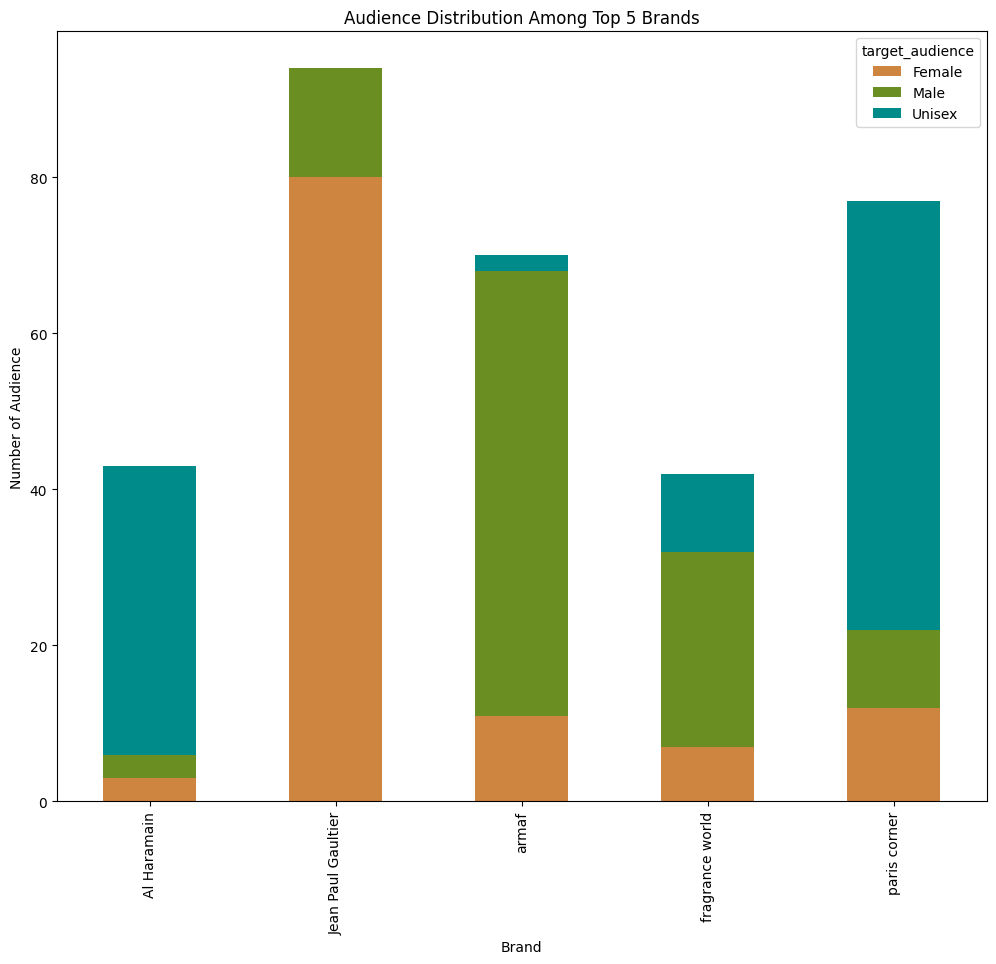

In [91]:
#Provides the Target Audience Distribution for each of the Popular Brands
#Who are the primary audience for the top 5 brands?
pivot_audience = brand__audience.pivot(
    index="brand",
    columns="target_audience",
    values="count"
).fillna(0)

pivot_audience.plot(kind="bar", stacked=True, figsize=(12,10),color=colors)
plt.title("Audience Distribution Among Top 5 Brands")
plt.xlabel("Brand")
plt.ylabel("Number of Audience")
plt.show()



Based on the data, Brand Jean Paul Gauliter focuses heavily on Female perfumes, while brand Al Haramain and paris corner offers more Unisex options, indicating a broader market strategy.

In [92]:
#How many distinct perfumes does each brand offer?
brand_perfumes = df.groupby(["brand", "perfume"]).size().reset_index(name="count")

pivot_perfumes = brand_perfumes.pivot(
    index = "brand",
    columns="perfume",
    values="count"
)


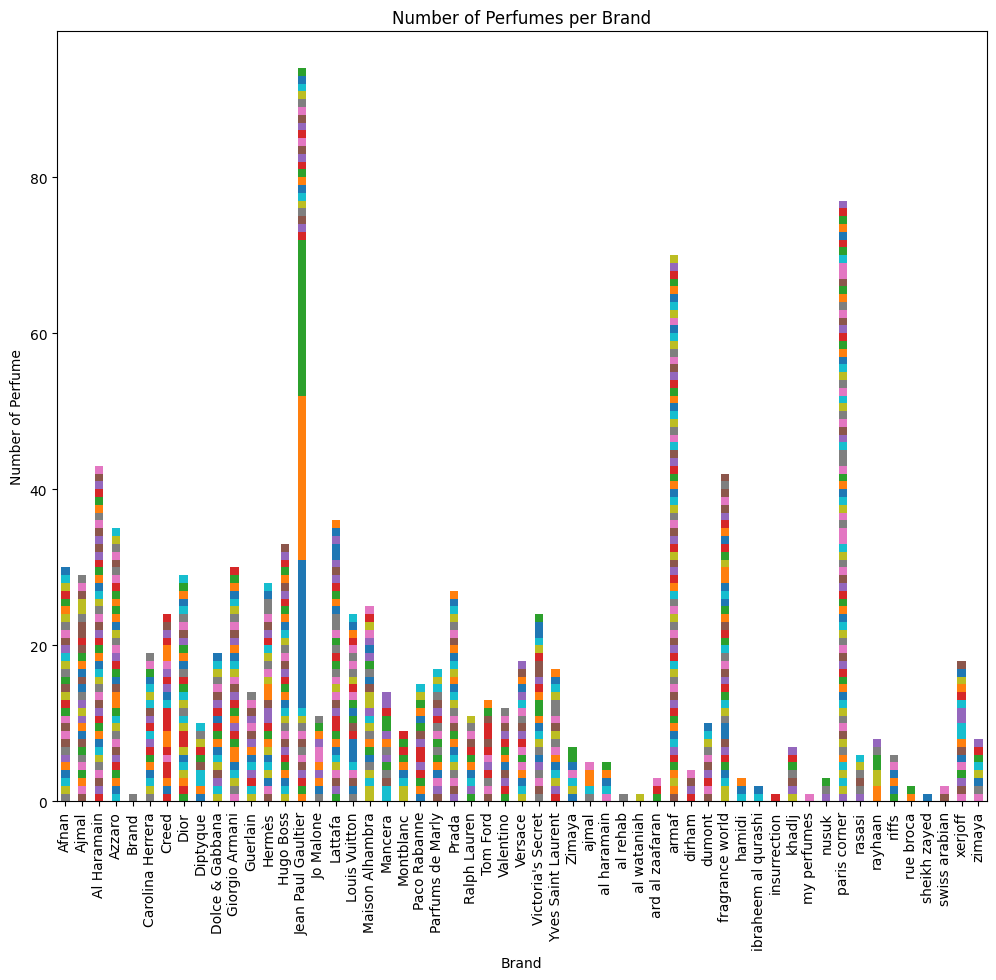

In [93]:
pivot_perfumes.plot(kind="bar", stacked=True, figsize=(12,10))
plt.title("Number of Perfumes per Brand")
plt.xlabel("Brand")
plt.ylabel("Number of Perfume")
plt.legend().remove()
plt.show()

About 80% of brands have more than 5 different types of perfumes. 10% of brands only have 1 type of perfume. 

In [94]:
#How long do perfumes last on average for each brand?
brand_longevity = df.groupby(["brand", "longevity"]).size().reset_index(name="count")

pivot_longevity = brand_longevity.pivot(
    index="brand",
    columns="longevity",
    values="count"
)

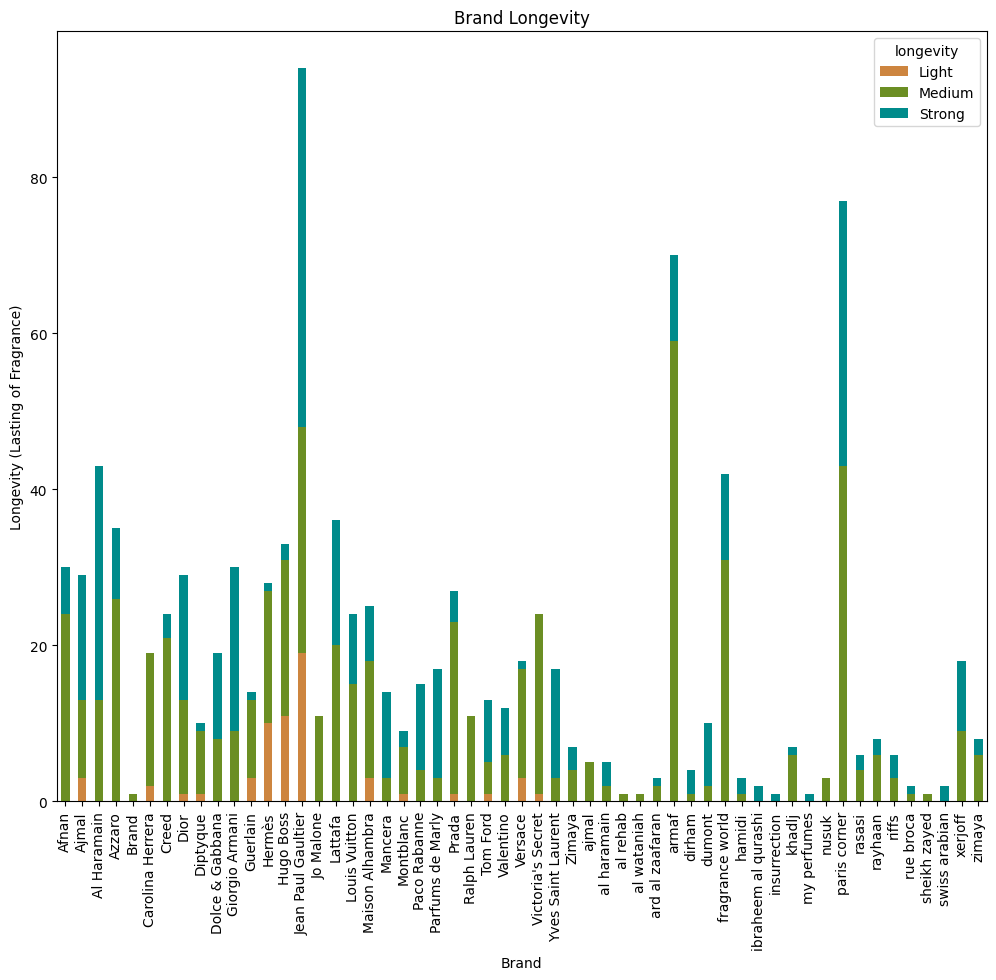

In [95]:
pivot_longevity.plot(kind="bar", stacked=True, figsize=(12,10),color=colors)
plt.title("Brand Longevity")
plt.xlabel("Brand")
plt.ylabel("Longevity (Lasting of Fragrance)")
plt.show()

Most brands have a dominant number of Medium longevity perfumes, but Brand Jean Paul Gaultier has a notably higher count of Strong perfumes,implying longer lasting fragrances.

In [112]:
colors={"saddlebrown","darkgoldenrod","darkkhaki"}

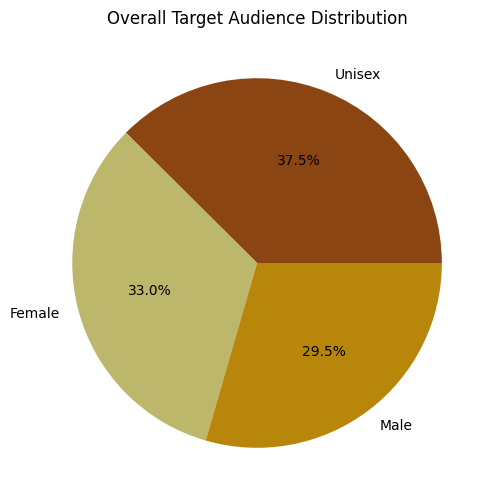

In [113]:
audience_counts = df["target_audience"].value_counts()
audience_counts.plot(kind="pie", autopct="%1.1f%%",figsize=(6,6),colors=colors)
plt.title("Overall Target Audience Distribution")
plt.ylabel("")
plt.show()

The Unisex category represents a significant share, reflecting modern marketing trends in the fragrance industry.

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import seaborn as sns

In [98]:
def compare_models(df, features, target, test_size=0.3, random_state=42):
    """
            Compare Random Forest and Logistic Regression for a given prediction task.
    """
    x = df[features].copy()
    y = df[target].copy()

    le_dict = {}
    for col in x.columns:
        if x[col].dtype == "object":
            le = LabelEncoder()
            x[col] = le.fit_transform(x[col])
            le_dict[col] = le

    if y.dtype == "object":
        le_target = LabelEncoder()
        y = le_target.fit_transform(y)
        target_classes = le_target.classes_
    else:
        le_target=None
        target_classes = None
    
    #Train/test split
    x_train, x_test, y_train, y_test = train_test_split(
        x,y,test_size=test_size, random_state=random_state
    )

    results = {}

    #Random Forest
    rf = RandomForestClassifier(random_state=random_state)
    rf.fit(x_train, y_train)
    y_pred_rf = rf.predict(x_test)
    
    print("\n--- Random Forest Results ---")
    print("Accuracy:", rf.score(x_test, y_test))
    print(classification_report(y_test, y_pred_rf, target_names=target_classes))

    plt.figure(figsize=(6,4))
    sns.heatmap(
        confusion_matrix(y_test, y_pred_rf),
        annot=True, fmt="d", cmap="Blues",
        xticklabels=target_classes, yticklabels=target_classes
    )

    plt.title("Random Forest Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    plt.figure(figsize=(6,4))
    sns.barplot(x=rf.feature_importances_, y=features)
    plt.title("Random Forest Feature Importance")
    plt.show()

    results["RandomForest"] = rf

    #Logistic Regression
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    log_reg = LogisticRegression(max_iter=1000,random_state=random_state)
    log_reg.fit(x_train_scaled, y_train)
    y_pred_lr = log_reg.predict(x_test_scaled)

    print("\n---Logistic Regression Results---")
    print("Accuracy:", log_reg.score(x_test_scaled, y_test))
    print(classification_report(y_test, y_pred_lr,target_names=target_classes))

    plt.figure(figsize=(6,4))
    sns.heatmap(
        confusion_matrix(y_test, y_pred_lr),
        annot=True, fmt="d", cmap="Greens",
        xticklabels=target_classes, yticklabels=target_classes
    )
    plt.title("Logisitc Regression Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    results["LogisticRegression"] = (log_reg, scaler)
    
    return results, le_dict, le_target

Model Output Includes:
    Accuracy score
    Classification report (precision, recall, F1-score)
    Confusion matrix
    Feature importance (Random Forest)


--- Random Forest Results ---
Accuracy: 0.6357615894039735
              precision    recall  f1-score   support

       Light       0.20      0.06      0.09        17
      Medium       0.73      0.67      0.70       175
      Strong       0.54      0.67      0.60       110

    accuracy                           0.64       302
   macro avg       0.49      0.47      0.46       302
weighted avg       0.63      0.64      0.63       302



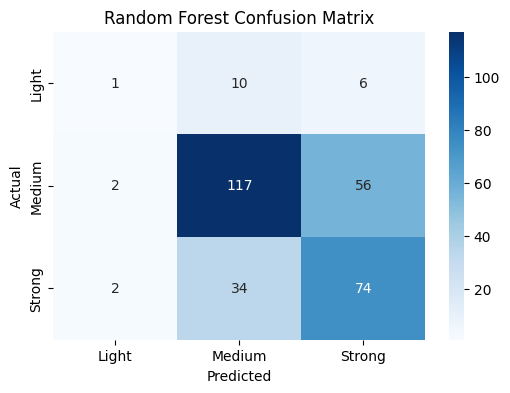

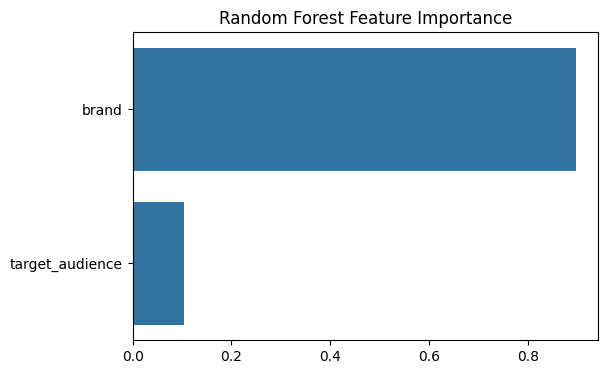


---Logistic Regression Results---
Accuracy: 0.5662251655629139
              precision    recall  f1-score   support

       Light       0.00      0.00      0.00        17
      Medium       0.58      0.90      0.71       175
      Strong       0.42      0.12      0.18       110

    accuracy                           0.57       302
   macro avg       0.33      0.34      0.30       302
weighted avg       0.49      0.57      0.48       302



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

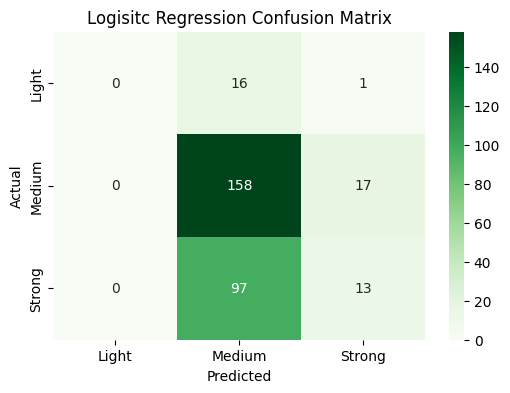

({'RandomForest': RandomForestClassifier(random_state=42),
  'LogisticRegression': (LogisticRegression(max_iter=1000, random_state=42),
   StandardScaler())},
 {'brand': LabelEncoder(), 'target_audience': LabelEncoder()},
 LabelEncoder())

In [99]:
#Predicting Longevity
compare_models(df, features=["brand", "target_audience"], target="longevity")

Goal: Predict whether a perfume's longevity is Light, Medium or Strong based on its brand and target audience.

Brands play a more significant role in determining perfume longevity compared to audience type, indicating that some brands specialize in either longer-lasting or lighter fragrances.


--- Random Forest Results ---
Accuracy: 0.8410596026490066
              precision    recall  f1-score   support

      Female       0.90      0.87      0.88       106
        Male       0.83      0.83      0.83        89
      Unisex       0.79      0.82      0.81       107

    accuracy                           0.84       302
   macro avg       0.84      0.84      0.84       302
weighted avg       0.84      0.84      0.84       302



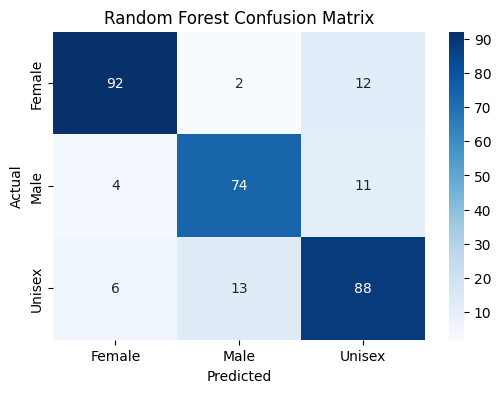

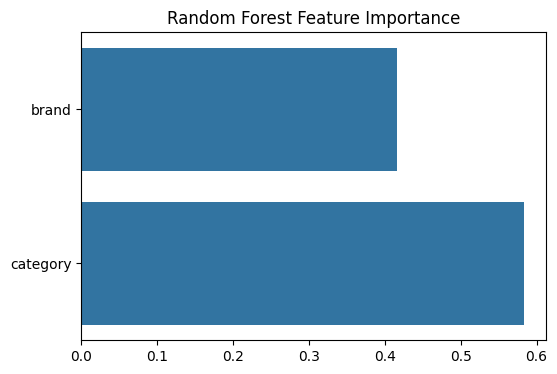


---Logistic Regression Results---
Accuracy: 0.4602649006622517
              precision    recall  f1-score   support

      Female       0.47      0.41      0.44       106
        Male       0.55      0.65      0.60        89
      Unisex       0.36      0.36      0.36       107

    accuracy                           0.46       302
   macro avg       0.46      0.47      0.46       302
weighted avg       0.46      0.46      0.46       302



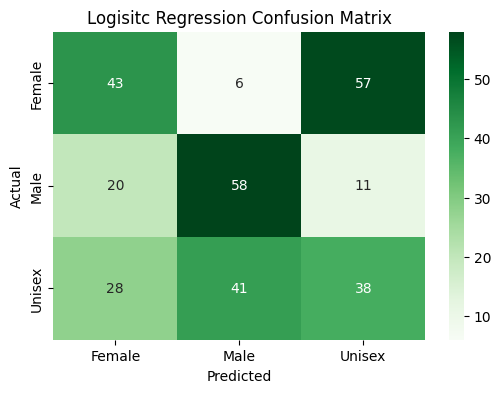

({'RandomForest': RandomForestClassifier(random_state=42),
  'LogisticRegression': (LogisticRegression(max_iter=1000, random_state=42),
   StandardScaler())},
 {'brand': LabelEncoder(), 'category': LabelEncoder()},
 LabelEncoder())

In [100]:
#Predicting Audience
compare_models(df, features=["brand", "category"], target="target_audience")

Goal: Identify what factors determine whether a perfume is marketed toward men, women or unisex.

Categories play a more significant role in determining perfume's audience compared to brand, indicating that certain categories correspond to specific target audience.


--- Random Forest Results ---
Accuracy: 0.652317880794702
              precision    recall  f1-score   support

       Light       0.43      0.18      0.25        17
      Medium       0.67      0.86      0.75       175
      Strong       0.61      0.40      0.48       110

    accuracy                           0.65       302
   macro avg       0.57      0.48      0.50       302
weighted avg       0.64      0.65      0.63       302



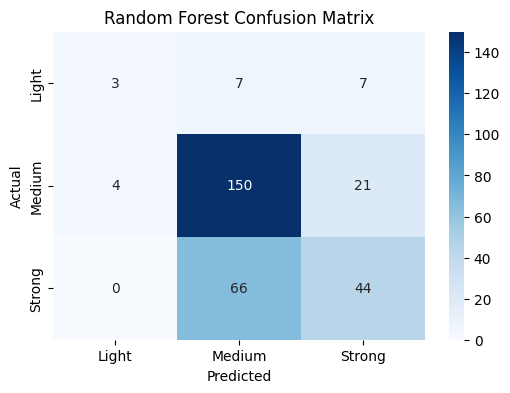

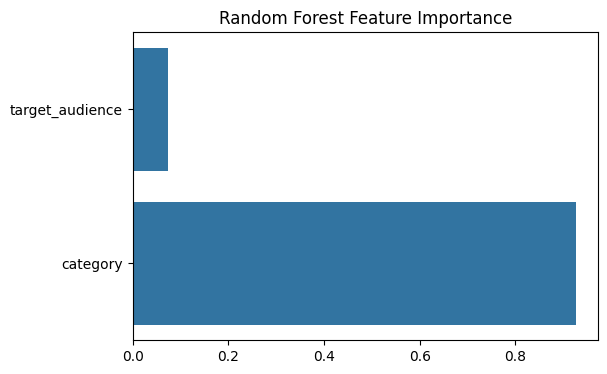


---Logistic Regression Results---
Accuracy: 0.5794701986754967
              precision    recall  f1-score   support

       Light       0.00      0.00      0.00        17
      Medium       0.58      1.00      0.73       175
      Strong       0.00      0.00      0.00       110

    accuracy                           0.58       302
   macro avg       0.19      0.33      0.24       302
weighted avg       0.34      0.58      0.43       302



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

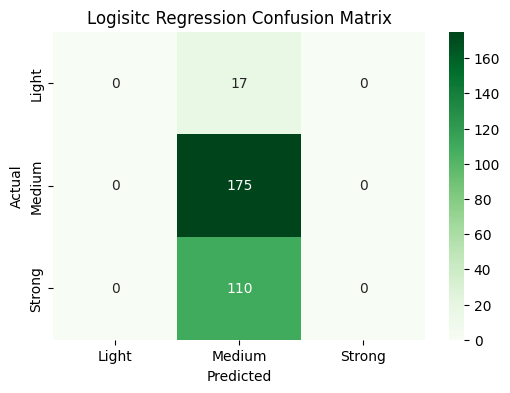

({'RandomForest': RandomForestClassifier(random_state=42),
  'LogisticRegression': (LogisticRegression(max_iter=1000, random_state=42),
   StandardScaler())},
 {'target_audience': LabelEncoder(), 'category': LabelEncoder()},
 LabelEncoder())

In [101]:
#Predicting Longevity
compare_models(df, features=["target_audience", "category"], target="longevity")

Goal: Predict the longeivty based on the target audience and category of the perfumes.

Category is a strong predictor of the longevity of a perfume. A fragrances such as fresh or floral can correlate with a light or short lasting perfume, while a category like woody or oriental tend to be long-lasting or strong.

* Key Insights & Takeaways *

    Market Landscape:
        Brands such as Jean Paul Gaultier and Paris Corner dominate the market in terms of product variety, suggesting broad catalog offerings and strong brand presence. Roughly 80% of brands produce more than 5 perfume types, while only 10% offer a single type, reflecting high competition and diversification in the industry.
    
    Audience Targeting:
        Brands strategies vary notably- Jean Paul Gaultier primarily targets female audiences, while Paris Corner and Al Haramain focus more on unisex perfumes, aligning with modern fragrance trends that apperal to broader demographics. The unisex category's siginificant share highlights the industry's move toward gender-neutral marketing.

    Longevity Trends:
        Most brands concentrate on medium longevity perfumes, but Jean Paul Gauliter stands out with a higher number of strong longevity scents, emphasizing long lasting formulation.

    Predictive Insights:
        Machine learning models (Random Forest) were applied to predict perfume longevity and target audience based on avaiable features.
        
        When predicting longevity, brand emerged as the most influential factor, suggesting that certain brands consistently craft fragrances with specific duration profiles.

        When predicting target audience, category proved more predictive than brand- meaning that fragrance types such as floral or fresh are often aligned with female-marketed perfumes, while woody or oriental categories correlate with unisex or male fragrances.